In [1]:
import pandas as pd
import numpy as np
import re
import nltk
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("IMDB_Top250Engmovies2_OMDB_Detailed.csv")
df.head()

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings.Source,Ratings.Value,Metascore,imdbRating,imdbVotes,imdbID,Type,tomatoMeter,tomatoImage,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.3/10,80.0,9.3,"1,825,626",tt0111161,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.2/10,100.0,9.2,"1,243,444",tt0068646,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,85.0,9.0,"856,870",tt0071562,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,9.0/10,82.0,9.0,"1,802,351",tt0468569,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,https://images-na.ssl-images-amazon.com/images...,Internet Movie Database,8.9/10,96.0,8.9,"494,215",tt0050083,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [3]:
len(df)

250

In [4]:
df['Plot'][0]

'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

## Data Preprocessing

In [5]:
df['clean_plot'] = df['Plot'].str.lower()
df['clean_plot'] = df['clean_plot'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
df['clean_plot'] = df['clean_plot'].apply(lambda x: re.sub('\s+', ' ', x))
df['clean_plot']

0      two imprisoned men bond over a number of years...
1      the aging patriarch of an organized crime dyna...
2      the early life and career of vito corleone in ...
3      when the menace known as the joker emerges fro...
4      a jury holdout attempts to prevent a miscarria...
                             ...                        
245    the desperate life of a chronic alcoholic is f...
246    a something supervising staff member of a resi...
247    a newspaper editor uses every trick in the boo...
248    an old man makes a long journey by lawn mover ...
249    a mumbai teen reflects on his upbringing in th...
Name: clean_plot, Length: 250, dtype: object

In [6]:
# tokenize the sentence
df['clean_plot'] = df['clean_plot'].apply(lambda x: nltk.word_tokenize(x))
df['clean_plot']

0      [two, imprisoned, men, bond, over, a, number, ...
1      [the, aging, patriarch, of, an, organized, cri...
2      [the, early, life, and, career, of, vito, corl...
3      [when, the, menace, known, as, the, joker, eme...
4      [a, jury, holdout, attempts, to, prevent, a, m...
                             ...                        
245    [the, desperate, life, of, a, chronic, alcohol...
246    [a, something, supervising, staff, member, of,...
247    [a, newspaper, editor, uses, every, trick, in,...
248    [an, old, man, makes, a, long, journey, by, la...
249    [a, mumbai, teen, reflects, on, his, upbringin...
Name: clean_plot, Length: 250, dtype: object

In [7]:
# remove stopwords
stop_words = nltk.corpus.stopwords.words('english')
plot = []
for sentence in df['clean_plot']:
    temp = []
    for word in sentence:
        if word not in stop_words and len(word) >= 3:
            temp.append(word)
    plot.append(temp)
plot

[['two',
  'imprisoned',
  'men',
  'bond',
  'number',
  'years',
  'finding',
  'solace',
  'eventual',
  'redemption',
  'acts',
  'common',
  'decency'],
 ['aging',
  'patriarch',
  'organized',
  'crime',
  'dynasty',
  'transfers',
  'control',
  'clandestine',
  'empire',
  'reluctant',
  'son'],
 ['early',
  'life',
  'career',
  'vito',
  'corleone',
  'new',
  'york',
  'portrayed',
  'son',
  'michael',
  'expands',
  'tightens',
  'grip',
  'family',
  'crime',
  'syndicate'],
 ['menace',
  'known',
  'joker',
  'emerges',
  'mysterious',
  'past',
  'wreaks',
  'havoc',
  'chaos',
  'people',
  'gotham',
  'dark',
  'knight',
  'must',
  'accept',
  'one',
  'greatest',
  'psychological',
  'physical',
  'tests',
  'ability',
  'fight',
  'injustice'],
 ['jury',
  'holdout',
  'attempts',
  'prevent',
  'miscarriage',
  'justice',
  'forcing',
  'colleagues',
  'reconsider',
  'evidence'],
 ['german',
  'occupied',
  'poland',
  'world',
  'war',
  'oskar',
  'schindler',


In [8]:
df['clean_plot'] = plot

In [9]:
df['clean_plot']

0      [two, imprisoned, men, bond, number, years, fi...
1      [aging, patriarch, organized, crime, dynasty, ...
2      [early, life, career, vito, corleone, new, yor...
3      [menace, known, joker, emerges, mysterious, pa...
4      [jury, holdout, attempts, prevent, miscarriage...
                             ...                        
245    [desperate, life, chronic, alcoholic, followed...
246    [something, supervising, staff, member, reside...
247    [newspaper, editor, uses, every, trick, book, ...
248    [old, man, makes, long, journey, lawn, mover, ...
249    [mumbai, teen, reflects, upbringing, slums, ac...
Name: clean_plot, Length: 250, dtype: object

In [11]:
df['Genre'] = df['Genre'].apply(lambda x: x.split(','))
df['Actors'] = df['Actors'].apply(lambda x: x.split(',')[:4])
df['Director'] = df['Director'].apply(lambda x: x.split(','))

In [12]:
df['Actors'][0]

['Tim Robbins', ' Morgan Freeman', ' Bob Gunton', ' William Sadler']

In [13]:
def clean(sentence):
    temp = []
    for word in sentence:
        temp.append(word.lower().replace(' ', ''))
    return temp

In [14]:
df['Genre'] = [clean(x) for x in df['Genre']]
df['Actors'] = [clean(x) for x in df['Actors']]
df['Director'] = [clean(x) for x in df['Director']]

In [15]:
df['Actors'][0]

['timrobbins', 'morganfreeman', 'bobgunton', 'williamsadler']

In [16]:
# combining all the columns data
columns = ['clean_plot', 'Genre', 'Actors', 'Director']
l = []
for i in range(len(df)):
    words = ''
    for col in columns:
        words += ' '.join(df[col][i]) + ' '
    l.append(words)
l

['two imprisoned men bond number years finding solace eventual redemption acts common decency crime drama timrobbins morganfreeman bobgunton williamsadler frankdarabont ',
 'aging patriarch organized crime dynasty transfers control clandestine empire reluctant son crime drama marlonbrando alpacino jamescaan richards.castellano francisfordcoppola ',
 'early life career vito corleone new york portrayed son michael expands tightens grip family crime syndicate crime drama alpacino robertduvall dianekeaton robertdeniro francisfordcoppola ',
 'menace known joker emerges mysterious past wreaks havoc chaos people gotham dark knight must accept one greatest psychological physical tests ability fight injustice action crime drama christianbale heathledger aaroneckhart michaelcaine christophernolan ',
 'jury holdout attempts prevent miscarriage justice forcing colleagues reconsider evidence crime drama martinbalsam johnfiedler leej.cobb e.g.marshall sidneylumet ',
 'german occupied poland world wa

In [17]:
df['clean_input'] = l
df = df[['Title', 'clean_input']]
df.head()

,Title,clean_input
0,The Shawshank Redemption,two imprisoned men bond number years finding s...
1,The Godfather,aging patriarch organized crime dynasty transf...
2,The Godfather: Part II,early life career vito corleone new york portr...
3,The Dark Knight,menace known joker emerges mysterious past wre...
4,12 Angry Men,jury holdout attempts prevent miscarriage just...


## Feature Extraction

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df['clean_input'])

In [19]:
# create cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(features, features)
print(cosine_sim)

[[1.         0.02693012 0.02567883 ... 0.00369409 0.00358765 0.00349224]
 [0.02693012 1.         0.18053579 ... 0.00386089 0.00374964 0.00364992]
 [0.02567883 0.18053579 1.         ... 0.00368149 0.00357542 0.00348033]
 ...
 [0.00369409 0.00386089 0.00368149 ... 1.         0.00373351 0.00363421]
 [0.00358765 0.00374964 0.00357542 ... 0.00373351 1.         0.0035295 ]
 [0.00349224 0.00364992 0.00348033 ... 0.00363421 0.0035295  1.        ]]


<Axes: >

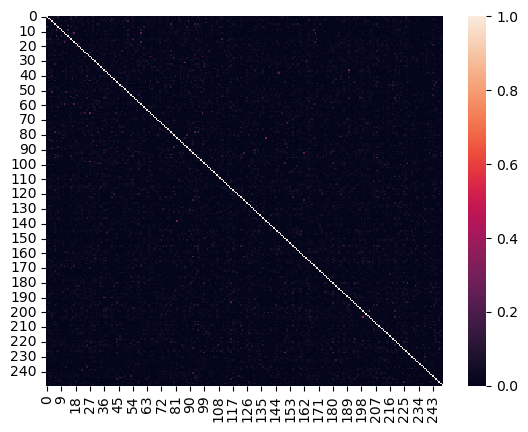

In [20]:
import seaborn as sns
sns.heatmap(cosine_sim)

## Movie Recommendation

In [21]:
index = pd.Series(df['Title'])
index.head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                12 Angry Men
Name: Title, dtype: object

In [22]:
def recommend_movies(title):
    movies = []
    idx = index[index == title].index[0]
    # print(idx)
    score = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    top10 = list(score.iloc[1:11].index)
    # print(top10)
    
    for i in top10:
        movies.append(df['Title'][i])
    return movies

In [28]:
recommend_movies('12 Angry Men')

['On the Waterfront',
 'The Exorcist',
 'American History X',
 'Dog Day Afternoon',
 'L.A. Confidential',
 'Network',
 'A Christmas Story',
 'The Nightmare Before Christmas',
 'Logan',
 'The Godfather']

In [29]:
recommend_movies('On the Waterfront')

['A Streetcar Named Desire',
 '12 Angry Men',
 'The Exorcist',
 'The Godfather',
 'V for Vendetta',
 'Gone Girl',
 'Gladiator',
 'Patton',
 'Kind Hearts and Coronets',
 'Modern Times']

In [30]:
recommend_movies('Kind Hearts and Coronets')

['On the Waterfront',
 'V for Vendetta',
 'The Great Dictator',
 'WALL·E',
 'The Grapes of Wrath',
 'Up',
 'Lawrence of Arabia',
 'The Lord of the Rings: The Two Towers',
 'The Bridge on the River Kwai',
 'Mary and Max']